<a href="https://colab.research.google.com/github/Nomikhan647/DataScience/blob/main/Linear_Regression_E_commerce_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


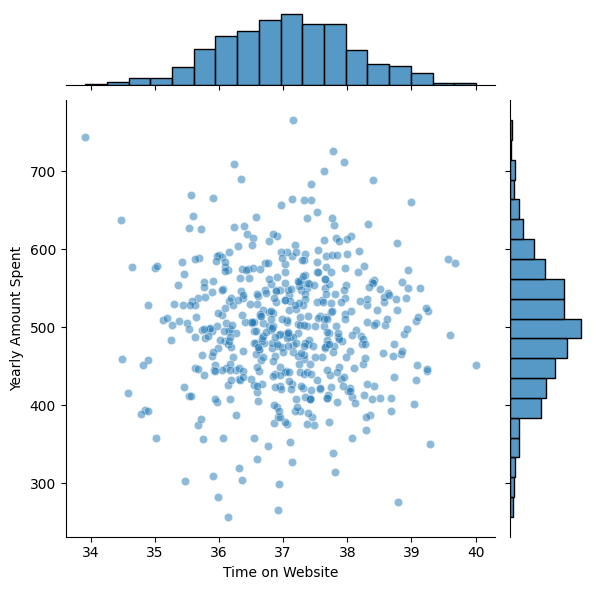

In [6]:
# EDA
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, alpha=0.5)

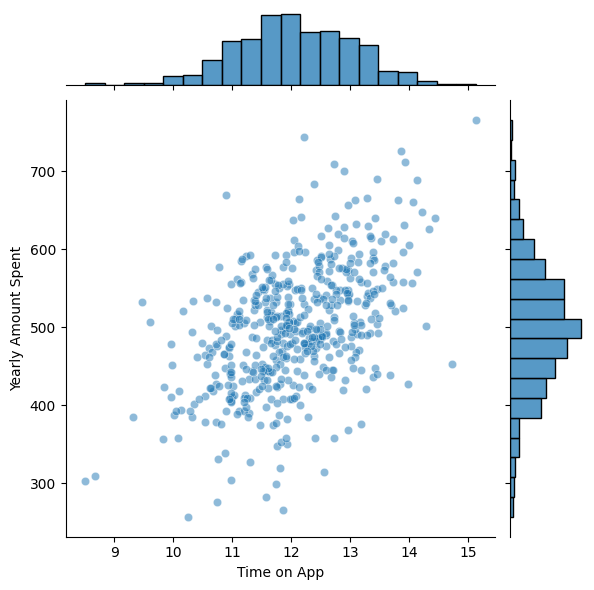

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, alpha=0.5)

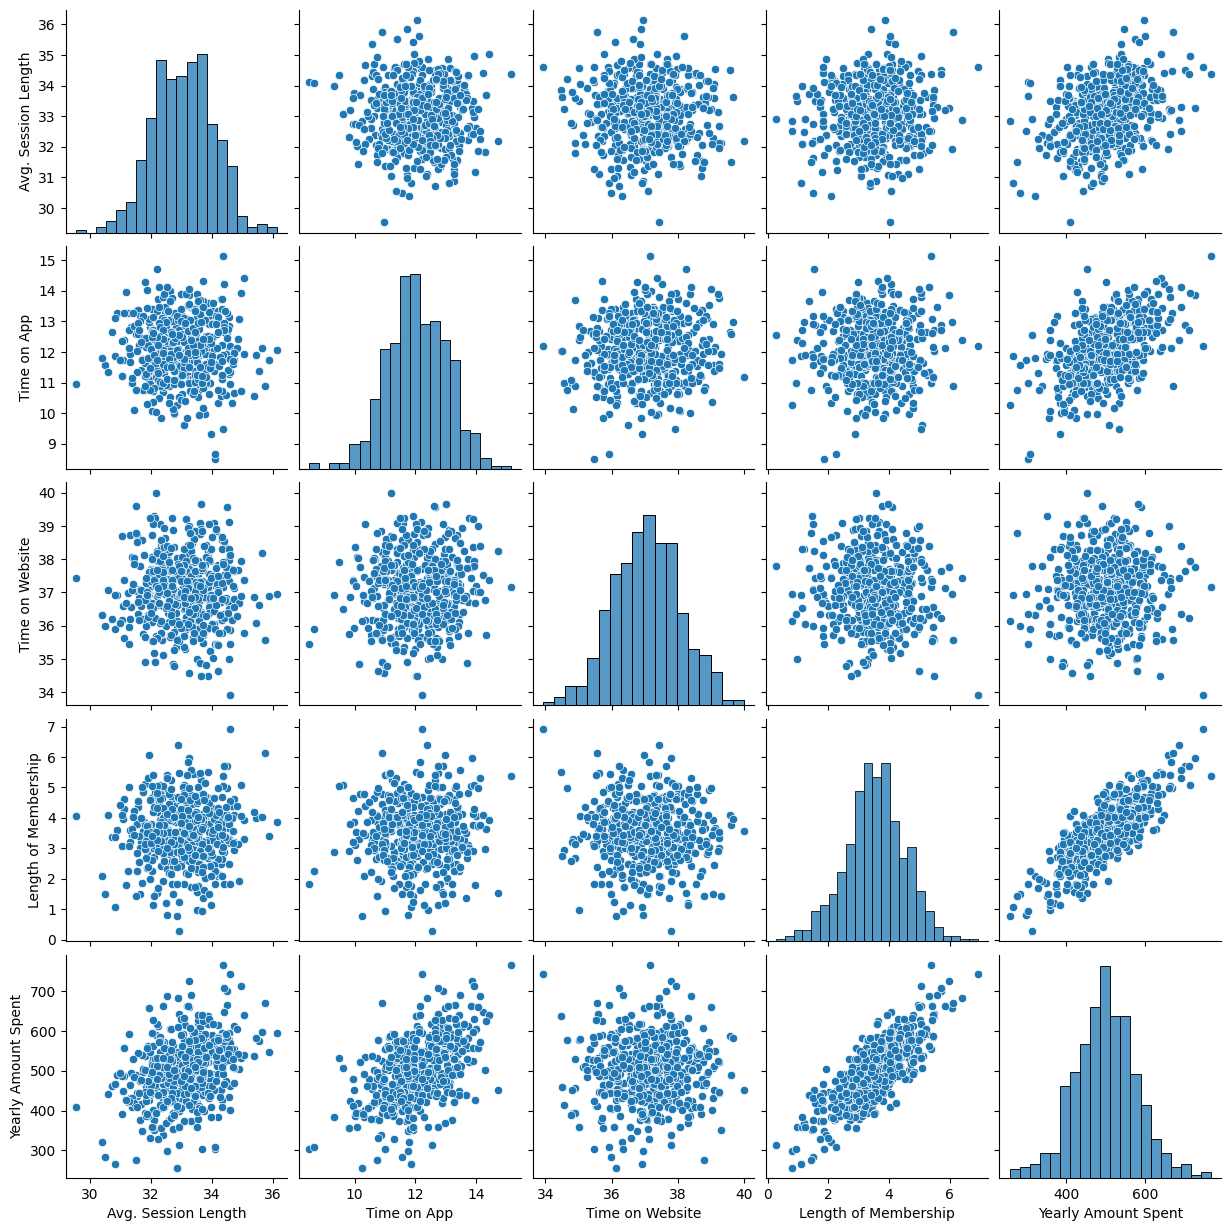

In [8]:
sns.pairplot(df)

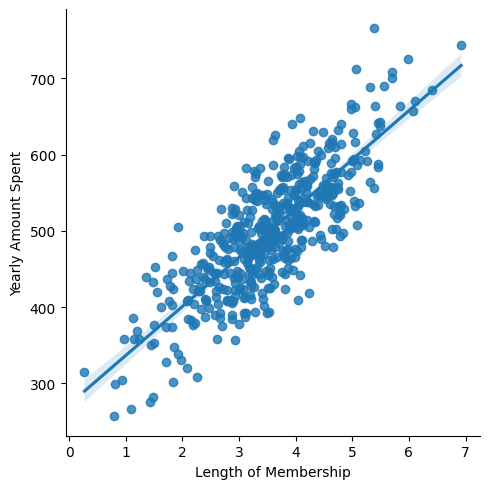

In [11]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
model.coef_

array([25.71269816, 38.7726567 ,  0.08833411, 61.5353385 ])

In [18]:
coed = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coed

,Coefficient
Avg. Session Length,25.712698
Time on App,38.772657
Time on Website,0.088334
Length of Membership,61.535339


In [21]:
prediction = model.predict(X_test)
prediction

array([519.3265486 , 583.16328706, 505.37911841, 376.82854381,
       487.3100164 , 424.40009689, 433.91966531, 383.9653394 ,
       634.50430595, 531.92386592, 504.91230761, 356.92668323,
       607.53094135, 529.65124227, 464.02694487, 500.08668775,
       518.80492662, 498.12037035, 325.38476986, 556.34206016,
       461.02903411, 337.04403433, 552.82663457, 431.73322613,
       564.86039812, 534.20171758, 427.71275626, 562.63475859,
       591.25800859, 512.41924867, 473.62782687, 456.10359568,
       724.75592916, 460.44791131, 494.69099942, 443.98815598,
       428.50440754, 512.21661114, 605.68362019, 471.11848175,
       514.12296769, 619.63810279, 527.51557001, 374.84380858,
       513.75415496, 472.77844194, 475.19175186, 402.02406421,
       555.00609028, 598.31559484, 494.27108029, 578.00462587,
       599.44009971, 574.42481366, 588.48435208, 548.1081801 ,
       410.8718534 , 416.87688541, 511.91294361, 456.96293242,
       426.24041372, 460.16547432, 576.47389334, 564.42

<Axes: xlabel='Yearly Amount Spent'>

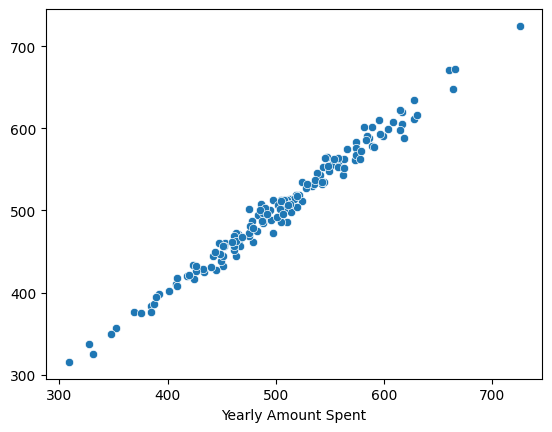

In [22]:
sns.scatterplot(x=y_test, y=prediction)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, prediction))
print(mean_squared_error(y_test, prediction))

7.7435263481286905
97.13539573199459


<ipython-input-24-e91938042609>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dirst, bins=50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

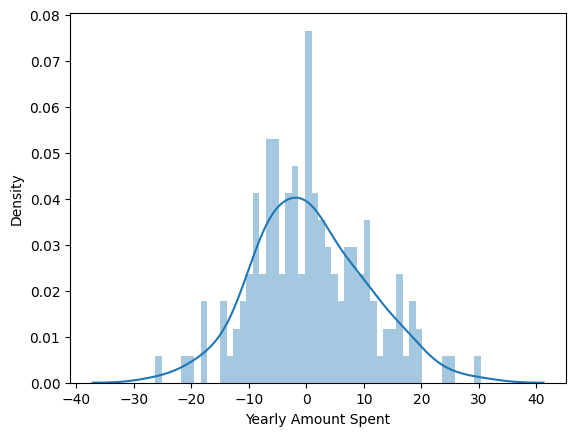

In [24]:
dirst = y_test - prediction
sns.distplot(dirst, bins=50)